## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [8]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from nilearn.maskers import NiftiMasker
from nilearn import image

from scipy.signal import periodogram

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [9]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    #config['list_subjects']=config["list_subjects_younger"]
seed_indiv=False
config["masks"]["brain"]="/templates/MNI/MNI152_T1_1mm_brain_mask_2mm.nii.gz"


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Extract voxels info </font></span>


### <font color=#4424D6> B.I. Extract signal in each voxels </font>

In [22]:
img=[]; ts=[]
config["list_subjects_all"]=["A006"]
#mask= config["main_dir"] + config["masks"]["brain"]
mask=config["main_dir"] + "templates/MNI/sub-P030_brain_CSF_inMNI_2mm.nii.gz"
masker= NiftiMasker(mask,smoothing_fwhm=None, t_r=1.55,low_pass=None, high_pass=None) # seed masker
img={};ts={}
for filtering in ["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"]:
    img[filtering]=[];ts[filtering]=[]
    for sbj_nb in range(0,len(config["list_subjects_all"])):
        subject_name=config["list_subjects_all"][sbj_nb]
        if filtering == "nodenoising":
            img[filtering].append(glob.glob(config["input_func"]["seed_dir"] + "sub-"+ subject_name + "/brain/*moco_inTemplate2mm.nii.gz")[0])
        elif filtering == "HRRVT" or "BP_noCompCor":
            img[filtering].append(glob.glob(config["input_func"]["seed_dir"] + "sub-"+ subject_name + "/brain/*"+filtering+"_reg_SPM_inTemplate2mm.nii.gz")[0])
    
        else:
            img[filtering].append(glob.glob(config["input_func"]["seed_dir"] + "sub-"+ subject_name + "/brain/*brsc_"+filtering+"_reg_SPM_inTemplate2mm.nii.gz")[0])
        ts[filtering].append(masker.fit_transform(img[filtering][sbj_nb])) #low_pass=0.1,high_pass=0.01
       

### <font color=#4424D6> B.II. Calculate the signal distribution for each voxels </font>

## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Plot signal frequency </font></span>
### <font color=#4424D6> I. Plot one voxel as an exemple </font>


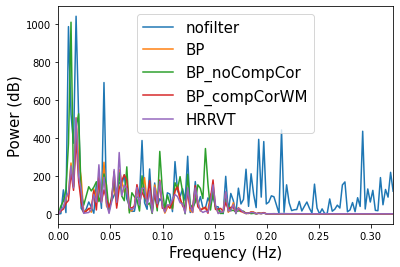

In [24]:
sbj_nb=0
TR = 1.55
sampling_frequency = 1 / TR  
for filtering in ["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"]:

    freq, power = periodogram(ts[filtering][sbj_nb][:,24000], fs=sampling_frequency)
    plt.plot(freq, power)
    plt.xlim(0, freq.max())
    plt.xlabel('Frequency (Hz)', fontsize=15)
    plt.ylabel('Power (dB)', fontsize=15)
    plt.legend(["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"], fontsize=15)



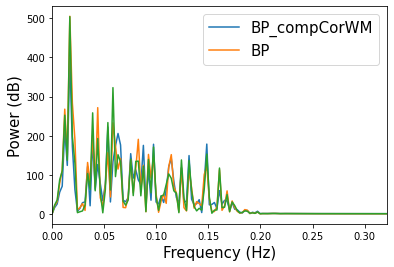

In [29]:
sbj_nb=0
TR = 1.55
sampling_frequency = 1 / TR  
for filtering in ["BP_compCorWM","BP","HRRVT"]:

    freq, power = periodogram(ts[filtering][sbj_nb][:,24000], fs=sampling_frequency)
    plt.plot(freq, power)
    plt.xlim(0, freq.max())
    plt.xlabel('Frequency (Hz)', fontsize=15)
    plt.ylabel('Power (dB)', fontsize=15)
    plt.legend(["BP_compCorWM","BP"], fontsize=15)



### <font color=#4424D6> II. Calculate the mean power across voxels </font>

In [30]:
import numpy as np
power_mean={}
for filtering in ["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"]:

    freq=[]; power=[];power_all=[]; freq_all=[]
    for vox in range(0,ts[filtering][sbj_nb].shape[1]):
        freq, power = periodogram(ts[filtering][sbj_nb][:,vox], fs=sampling_frequency)
        freq_all.append(freq);power_all.append(power)

    power_mean[filtering]=np.mean(power_all,axis=0)


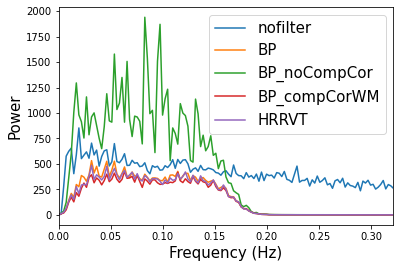

In [31]:
for filtering in ["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"]:

    plt.plot(freq, power_mean[filtering])
    plt.xlim(0, freq.max())
    plt.xlabel('Frequency (Hz)', fontsize=15)
    plt.ylabel('Power', fontsize=15)
plt.legend(["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"], fontsize=15)


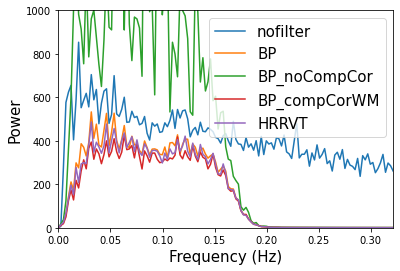

In [33]:
for filtering in ["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"]:

    plt.plot(freq, power_mean[filtering])
    plt.xlim(0, freq.max())
    plt.ylim(0, 1000)
    plt.xlabel('Frequency (Hz)', fontsize=15)
    plt.ylabel('Power', fontsize=15)
plt.legend(["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"], fontsize=15)


## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Carpet plot </font></span>

In [ ]:
from nilearn.plotting import plot_carpet
for filtering in ["nofilter","BP","BP_noCompCor","BP_compCorWM","HRRVT"]:

    print("data " + filtering)
    display = plot_carpet(img[filtering][sbj_nb],mask,t_r=1.55)

    display.show()
    print(" ")

data nofilter
